# Position Calculator of Laser (P.C.L.)
Designed by Hao Wang $$ $$
Version 3.7 --last update 2023-Feb-10$$ $$
Email harrywang11@126.com for any problem

In [1]:
import serial # pip install pyserial
import time
#import serial.tools.list_ports
import cv2 # pip install opencv-python
import os
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pyfirmata #pip install pyfirmata
import pylab
import pandas as pd
import numpy as np
import IPython.display as ipd
from datetime import datetime
import imageio

import imageio
import scipy.ndimage as ndi

In [2]:
def array_to_html(arr, row_names=None, col_names=None, title=None):
    ''' array_to_html, if placed at the end of a Anaconda cell, will
        display the array in html.   It uses pandas.
    '''
    if len(arr.shape) not in [1, 2]:
        print('The array must be a one- or two-dimensional array. This array is',
             len(arr.shape), 'dimensions')
        return

    if title:
        ipd.display(ipd.HTML('<h1>' + title + '</h1>'))
    df = pd.DataFrame(arr, index=row_names, columns=col_names)
    return ipd.display(ipd.HTML(df.to_html()))

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
# get folder
dire =os.getcwd()+'/2.1 flow'
lise = dire+'//*.jpg' # change to the correct file extension (.tif,.jpeg etc.)
listofnames = glob.glob(lise)
arr = os.listdir(dire);
loc=[]
# sort all imges based on time
for i in range(len(arr)):
    #print(i.find('_'))
    st = arr[i]
    #print(st)
    loc.append(int(st[0:st.find('.')]))
loc = np.array(loc)
listofnames = np.array(listofnames)
inds = loc.argsort()
sorted_file = listofnames[inds]
sorted_file

array(['/Users/harrywang/Library/CloudStorage/OneDrive-Personal/UNC/Research/William Polacheck/Data/Flow tracking/2.1 flow/0182653.jpg',
       '/Users/harrywang/Library/CloudStorage/OneDrive-Personal/UNC/Research/William Polacheck/Data/Flow tracking/2.1 flow/1183656.jpg',
       '/Users/harrywang/Library/CloudStorage/OneDrive-Personal/UNC/Research/William Polacheck/Data/Flow tracking/2.1 flow/2184659.jpg',
       '/Users/harrywang/Library/CloudStorage/OneDrive-Personal/UNC/Research/William Polacheck/Data/Flow tracking/2.1 flow/3185701.jpg',
       '/Users/harrywang/Library/CloudStorage/OneDrive-Personal/UNC/Research/William Polacheck/Data/Flow tracking/2.1 flow/4190704.jpg',
       '/Users/harrywang/Library/CloudStorage/OneDrive-Personal/UNC/Research/William Polacheck/Data/Flow tracking/2.1 flow/5191707.jpg',
       '/Users/harrywang/Library/CloudStorage/OneDrive-Personal/UNC/Research/William Polacheck/Data/Flow tracking/2.1 flow/6192710.jpg',
       '/Users/harrywang/Library/CloudSto

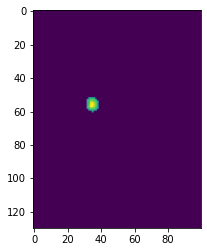

In [14]:
# get example location
img1 = mpimg.imread(sorted_file[15])
x = img1[250:380,500:600,0]
x[x<150] = 0
#x[x>=150]=1
plt.imshow(x)


In [15]:
#read second group
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
# analysis 3 locations at once
lll2=[]
lll3=[]
lll1=[]
for i in sorted_file[:]:
    img1 = mpimg.imread(i)
    img = img1.copy()
    #plt.imshow(img)
    #print(np.max(x))
    # pick location and thresholding
    x1= img[50:150,400:500,0]
    x1[x1<150] = 0
    x2= img[250:380,500:600,0]
    x2[x2<150] = 0
    x3 = img[150:250,480:550,0]
    #x[:,400:] = 0
    x3[x3<100] = 0
    #x[x>=140]=1
    #print(x)
    #print(x.size)
    cy3, cx3 = ndi.center_of_mass(x3)
    lll3.append(cy3)
    cy1, cx1 = ndi.center_of_mass(x1)
    lll1.append(cy1)
    cy2, cx2 = ndi.center_of_mass(x2)
    lll2.append(cy2)

/Applications/anaconda3/lib/python3.9/site-packages/scipy/ndimage/measurements.py:1406: RuntimeWarning: invalid value encountered in double_scalars
  results = [sum(input * grids[dir].astype(float), labels, index) / normalizer


In [19]:
# save location info as csv
np.savetxt("300Pa4.csv", lll2, delimiter=",")

In [17]:
lll2

[66.09577954648456,
 56.66949846468782,
 54.44678026111972,
 55.46345183620791,
 55.34481538280052,
 55.16652618904275,
 55.16271840497374,
 55.40781938325991,
 55.53702302453789,
 55.3028113356667,
 55.402121834360024,
 55.122478386167145,
 55.539607843137254,
 55.47084646555606,
 55.42479790504383,
 55.70767458904827,
 55.555481874447395,
 55.746815286624205,
 55.472988505747125,
 55.70779515069114,
 55.78400460299194,
 55.5545153556342,
 55.53669259384511,
 55.826744753538314,
 55.62168093043669,
 55.76624624624625,
 55.61919504643963,
 55.61870662113033,
 55.94484679665738,
 55.60502958579882,
 55.57447595561036,
 55.39691156955001,
 55.6681844052362,
 55.58962769120971,
 55.7698640389173,
 55.48715657806567,
 55.83963727478821,
 55.45211299954065,
 55.65143922619741,
 55.60966794669076,
 55.73663905594009,
 55.61478212906784,
 55.66148473583418,
 55.6705532693187,
 55.53459324427067,
 55.78573893041978,
 55.65486930372427,
 55.8035951260707,
 55.84453734041351,
 55.93961466165413,

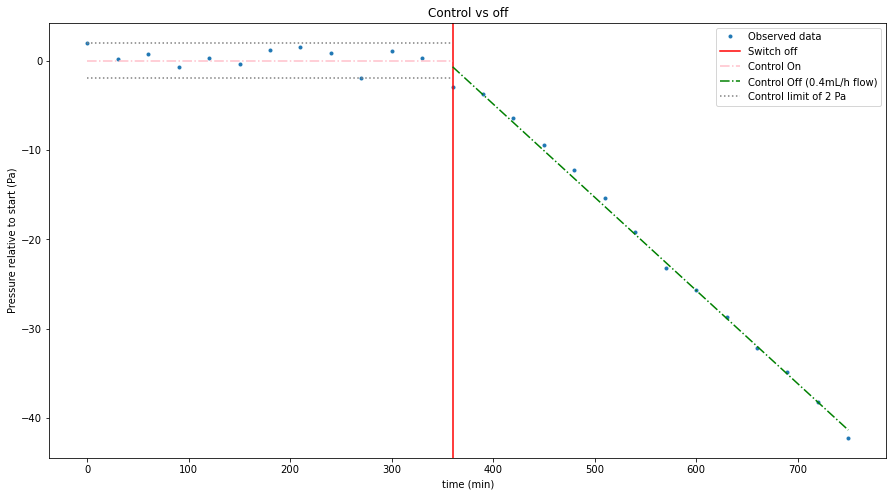

In [208]:
# plot exsiting data
#d = np.concatenate((fir,sec),axis=0)
d = np.array(lll2[12:38])*1.4   #calibration
y=d-np.max(d)+2
tt = np.arange(len(d))*30
plt.figure(figsize=(15,8))
plt.plot(tt,y,'.')
xd1=[0,360]
yd1=[0,0]
yd2=[2,2]
yd3=[-2,-2]
a, b = np.polyfit(tt[12:], y[12:], 1)
#plt.scatter(tt, y)
plt.axvline(x=360,color='r')
plt.plot(xd1,yd1,'-.',color='pink') 
plt.plot(tt[12:],tt[12:]*a+b,'-.',color='green') 
plt.plot(xd1,yd2,':',color='gray') 
plt.plot(xd1,yd3,':',color='gray') 
#equ = str(a)+'*t+'+str(b)+' (0.2mL/h)'
#plt.xticks(np.arange(len(d[:,0])), np.arange(0,len(d[:,0])*30,30),rotation=45)
#plt.ylim(ymax = 165, ymin = 145)
plt.xlabel('time (min)')
plt.ylabel('Pressure relative to start (Pa)')
plt.title('Control vs off')
plt.legend(['Observed data','Switch off','Control On','Control Off (0.4mL/h flow)','Control limit of 2 Pa'])
#print(a,b)
plt.savefig('control on.png')

Text(0,0.5,'Height (pixel)')

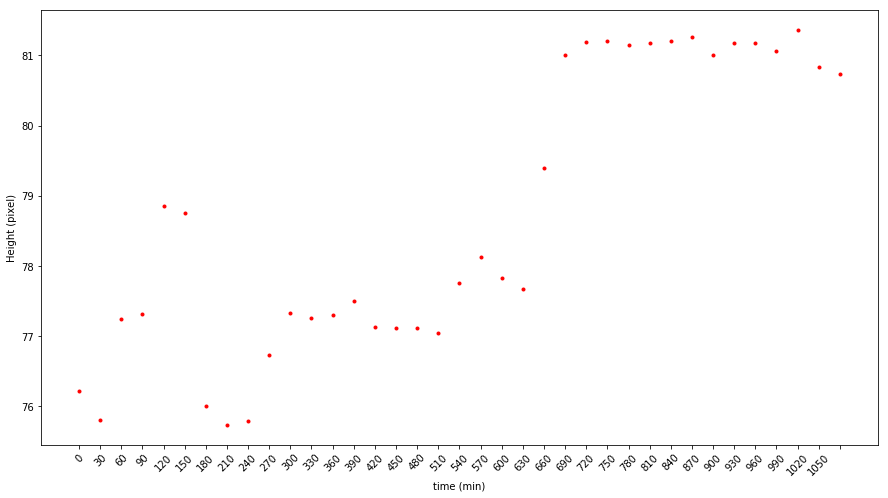

In [33]:

plt.figure(figsize=(15,8))
plt.plot(lll[:37,0],'.',color='r')
plt.xticks(np.arange(len(lll[:40,0])), np.arange(0,len(lll[:36,0])*30,30),rotation=45)
#plt.ylim(ymax = 100, ymin = 0)
plt.xlabel('time (min)')
plt.ylabel('Height (pixel)')

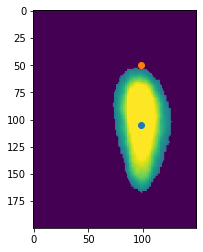

In [36]:
import pylab
import imageio
import scipy.ndimage as ndi
filename = '7.11 moving\\2.mp4'
vid = imageio.get_reader(filename,  'ffmpeg')
image=vid.get_data(0)
x = image[600:800,1100:1250,0]
    #print(type(x))
x[x<100] = 0
#x[x>=160]=1
cy, cx = ndi.center_of_mass(x)
plt.imshow(x)
plt.scatter(cx,cy)
#plt.scatter(cx,50)
#print(cx.type)

In [56]:
# analysis video data
import pylab
import imageio
import scipy.ndimage as ndi
filename = '7.11 moving\\2.mp4'# change file name here
vid = imageio.get_reader(filename,  'ffmpeg')
result = []
nums = [10, 287]
lengt = len(vid)
# loop through all frames
for i in np.arange(0,9000):
    image = vid.get_data(i)
    x = image[600:800,1100:1250,0]
    
    #print(type(x))
    x[x<100] = 0
    cy, cx = ndi.center_of_mass(x)
    #print(x)
    #print(x.size)
    result.append(cy)
    #lp = np.where(x==1)
    #print(lp)
    #print(lp[0])
    #if(len(lp[0])>0):
        #lc = np.average(lp,axis = 1)
        #print(lc)
        #result.append(lc[0])
    #else:
        #result.append(0)
    #print(x)
    #plt.imshow(x)
    if(i%100==0):
        print(i)
result=np.array(result)
result=result-result[0]
#result
#np.savetxt("1.5mgmL_1kPa_3.csv", result, delimiter=",")

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900


In [60]:
np.savetxt("moving.csv", result, delimiter=",")

In [91]:
ress = np.reshape(result,(600,15))
reee=np.average(ress,axis=1)
reee.shape
x=np.array([0,60,60,120,120,180,180,240])
y=np.array([0,0,17.5,17.5,0,0,17.5,17.5])
y.shape

(8,)

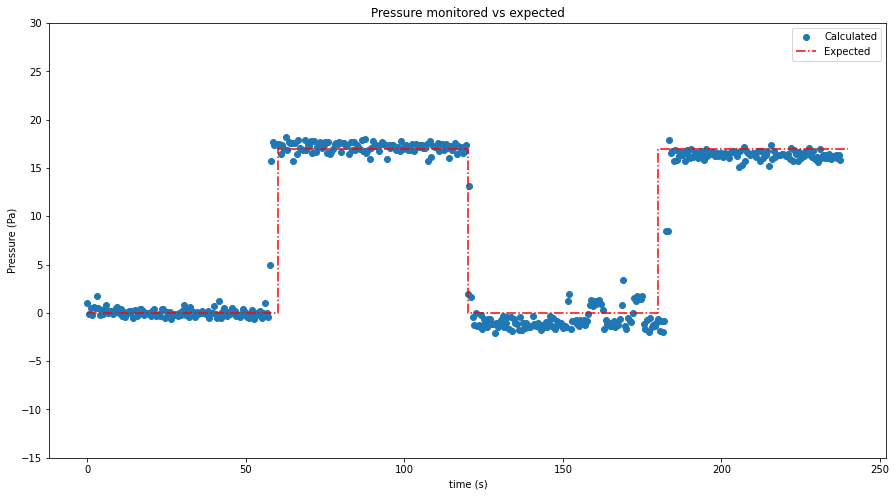

In [118]:
#print(len(result))
plt.figure(figsize=(15,8))
rep=reee[24:500]
lll = len(rep)
t=np.arange(lll)/2
#a, b = np.polyfit(t, result, 1)
plt.scatter(t, -(rep-1)*2.4)
x1=np.array([0,60,60,120,120,180,180,240])
y1=np.array([0,0,17,17,0,0,17,17])
plt.plot(x1,y1,'-.',color='r')
#plt.plot(t, a*t+b,color='r') 
plt.xlabel('time (s)')
plt.ylabel('Pressure (Pa)')
plt.legend(['Calculated','Expected'])
plt.ylim(-15,30)
plt.title('Pressure monitored vs expected')
plt.savefig('moving.png',dpi=300)
#print(a)

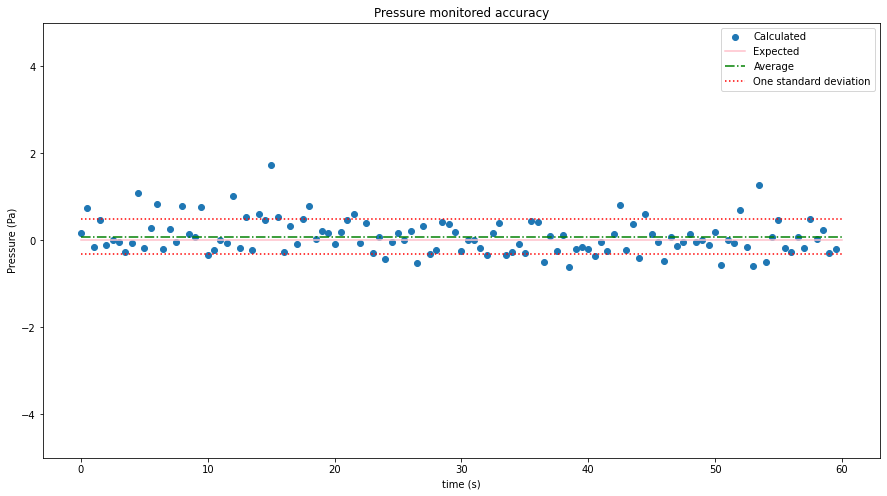

In [138]:
plt.figure(figsize=(15,8))
rep=reee[0:120]
lll = len(rep)
t=np.arange(lll)/2
daa = -(rep-1)*2.4
#a, b = np.polyfit(t, result, 1)
plt.scatter(t, daa)
x1=np.array([0,60])
y1=np.array([0,0])
x2=[0,60]
y2=np.array([0.0881255724935083,0.0881255724935083])
y3=y2+np.array([np.std(daa),np.std(daa)])
y4=y2-np.array([np.std(daa),np.std(daa)])
plt.plot(x1,y1,'-',color='pink')
plt.plot(x2,y2,'-.',color='green')
plt.plot(x2,y3,':',color='r')
plt.plot(x2,y4,':',color='r')
#plt.plot(t, a*t+b,color='r') 
plt.xlabel('time (s)')
plt.ylabel('Pressure (Pa)')
plt.legend(['Calculated','Expected','Average','One standard deviation'])
plt.ylim(-5,5)
plt.title('Pressure monitored accuracy')
plt.savefig('accuracy.png',dpi=300)

In [246]:
array_to_html(ddddt)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,5.329828,5.530021,8.302900,10.355060,10.425704,17.210493,18.799917,23.234011,26.082366,27.901366,34.699426,36.846709,40.022158,45.540916,48.859658,53.586541,56.789990,58.964391,60.972044,67.680290,71.855274,72.069367,76.607379,80.606193
1,0.660793,5.065788,8.634234,11.252482,14.622764,15.358006,18.013814,22.004058,24.674148,29.813334,31.324095,38.573974,42.897605,45.538167,49.874956,55.347661,58.090623,60.800702,67.079491,68.326416,69.321786,71.786866,73.545683,75.664555
2,19.322234,9.303495,7.415357,1.558785,13.587579,10.708007,7.999397,12.615210,24.513735,30.016683,36.351908,39.165749,22.504868,56.881418,57.865413,61.050973,60.730860,60.141427,69.417482,67.603099,74.314241,77.286752,65.552055,72.365272


In [88]:
# data conversion pixel -> mm
d1=(np.array(lll1[12:28])-33.6739252)/0.0005897*4/1000*1.736
d2=(np.array(lll2[1:17])-27.43840031)/0.0013388*4/1000*1.736
d3=(np.array(lll3[1:17])-28.29957909)/0.0007236162*4/1000*1.736
dt=np.array([d1,d2,d3])
np.std(dt,axis=0)

array([0.01307491, 1.246027  , 0.95811678, 1.23566373, 1.13139159,
       0.76533103, 0.36565873, 0.90459609, 0.23685466, 0.97925601,
       0.43526994, 0.18345816, 1.46267041, 0.61125785, 1.54889265,
       0.63358587])

In [155]:
dd1=(np.array(lll1[10:58])-34.54262567101371)/0.0004870000754437875*20/1000*1.736
dd2=(np.array(lll2[2:50])-36.95132116983216)/0.004204457788543814*20/1000*1.736
dd3=(np.array(lll3[2:50])-24.305581414691492)/-0.0015253178451463038*20/1000*1.736
ddt=np.array([dd1,dd2,dd3])

In [210]:
ddd1=(np.array(lll1[3:43])-33.00933037185569)/0.015204715436250618*100/1000*1.736
ddd2=(np.array(lll2[:40])-26.46258716835114)/-0.014552589168228788*100/1000*1.736
ddd3=(np.array(lll3[6:])-23.632293193576622)/0.0028363863950515863*100/1000*1.736
dddt=np.array([ddd1,ddd2,ddd3])

In [242]:
d20=(np.array(lll1[6:])-34.23954427392334)/0.036089704501169245*200/1000/3.5265
d21=(np.array(lll2[2:26])-37.48897216045175)/0.03906706446531674*200/1000/3.5265
d22=(np.array(lll3[6:])-23.632293193576622)/0.010875348501076621*200/1000/3.5265
ddddt=np.array([d20,d21,d22])

0.3471999999999992 3.5969654289771584e-13


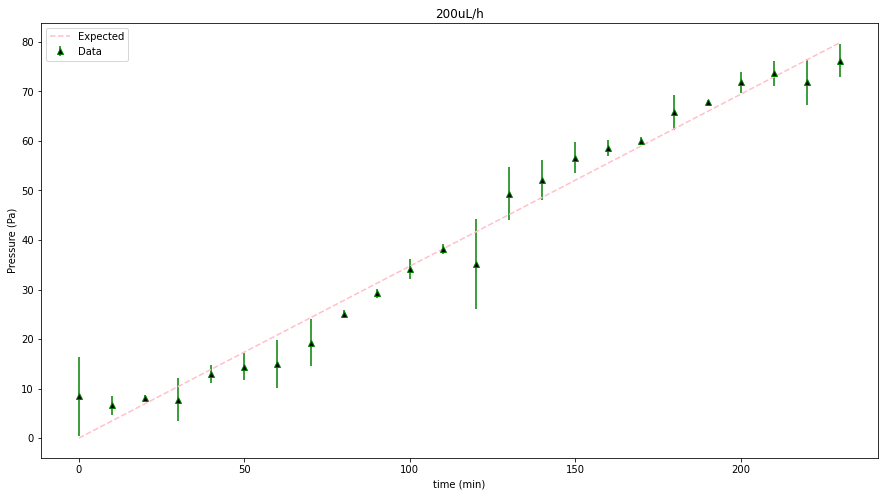

In [245]:
plt.figure(figsize=(15,8))
#plt.plot(result[200:1100],'.',color='r')
#plt.xticks(np.arange(0,900,30), np.arange(0,45,1),rotation=45)
#plt.ylim(ymax = 100, ymin = 0)
y = np.average(ddddt,axis=0)
#y=d22
er=np.std(ddddt,axis=0)
tt = np.arange(0,len(y)*10,10)

#print(tt)
#print(y)
a, b = np.polyfit(tt, y, 1)
#plt.scatter(tt, y)
plt.errorbar(tt, y, er, linestyle='None', marker='^',color='green',mfc='black')
plt.plot(tt, a*tt+b,'--',color='pink') 
#plt.plot(tt, 0.006944*tt,color='r')
#equ = str(a)+'*t+'+str(b)+' (4 uL/h)'
#plt.xticks(np.arange(0,30,1), np.arange(0,30,1),rotation=45)
plt.legend(['Expected','Data'])
plt.xlabel('time (min)')
plt.ylabel('Pressure (Pa)')
plt.title('200uL/h')
print(a,b)

In [69]:
imageio.plugins.ffmpeg.download()


Imageio: 'ffmpeg-win32-v3.2.4.exe' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-win32-v3.2.4.exe (34.1 MB)
Downloading: 8192/35749888 bytes (0.065536/35749888 bytes (0.2%122880/35749888 bytes (0.3180224/35749888 bytes (0.5237568/35749888 bytes (0.7294912/35749888 bytes (0.8352256/35749888 bytes (1.0409600/35749888 bytes (1.1466944/35749888 bytes (1.3524288/35749888 bytes (1.5581632/35749888 bytes (1.6638976/35749888 bytes (1.8696320/35749888 bytes (1.9753664/35749888 bytes (2.1811008/35749888 bytes (2.3868352/35749888 bytes (2.4925696/35749888 bytes (2.6983040/35749888 bytes (2.71040384/35749888 bytes (2.9%1097728/35749888 bytes (3.1%1155072/35749888 bytes (3.2%1212416/35749888 bytes (3.4%1269760/35749888 bytes (3.6%1327104/35749888 bytes (3.7%1384448/35749888 bytes (3.9%1441792/35749888 bytes (4.0%1499136/35749888 bytes (4.2%1556480/35749888 bytes (4.4%1613824/35749888 bytes (4.5%1671168/3

In [20]:
array_to_html(lll2[:,0], row_names=None, col_names=['height'], title='control on')

,height
0,51.406977
1,56.097087
2,58.589041
3,56.454545
4,56.940000
5,55.235294
6,53.545455
7,51.888889
8,50.250000
9,48.180328


-1.0138259956724056


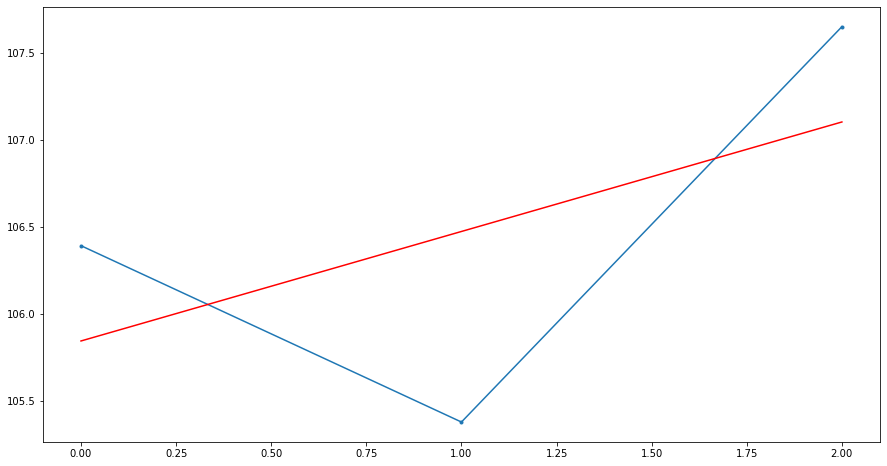

In [63]:
dire =os.getcwd()+'/7.11 cal'
lise = dire+'//*.jpg'
listofnames = glob.glob(lise)
arr = os.listdir(dire)
ll1=[]
ll2=[]
ll3=[]
for i in listofnames[:3]:
    img1 = mpimg.imread(i)
    img = img1.copy()
    #plt.imshow(img)
    #print(np.max(x))
    x = img[600:800,1100:1250,0]
    #print(type(x))
    x[x<100] = 0
#x[x>=160]=1
    cy, cx = ndi.center_of_mass(x)
    
    ll1.append(cy)
    #plt.imshow(x)
    
ll1=np.array(ll1)

tt=np.array([0,1,2])
a1, b1 = np.polyfit(tt, ll1[:], 1)
plt.figure(figsize=(15,8))
plt.plot(ll1[:],'.-')
plt.plot(tt, a1*tt+b1,color='r') 
print(ll1[1]-ll1[0])

In [8]:
dire

'/Users/harrywang/Library/CloudStorage/OneDrive-Personal/UNC/Research/William Polacheck/Data/Flow tracking'

In [7]:
dire =os.getcwd()
arr = os.listdir(dire);
folders=[]
for i in arr:
    #print(i)
    if os.path.isdir(i):
    #print(st)
        folders.append(i)
folders

['3.28 0.2mww',
 '7.5 2.5cm',
 'blink2',
 '4.18 0.4 wc',
 '7.1 2.5cm',
 'StandardFirmata',
 '7.25 200ulh wc',
 '5.9 0.2kpa',
 '7.19 200ulh',
 'Calibration',
 '7.26 4ulh wc',
 '2.22 img',
 '5.10 0.3kpa',
 '7.11 cal',
 '7.1 10cm',
 '7.11 moving',
 '7.25 20ulh wc',
 '4.11 0.4mlph',
 'img',
 '5.11 0.3 kpa',
 'blink1',
 '2.28 img',
 '3.3 img',
 '7.19 20ulh',
 '3.7 img',
 '3.25 0.2mlph',
 '3.4 img',
 '3.24 0.4mlph',
 '7.27 200ulh wc',
 '7.20 4ulh',
 '7.21 100 ulh',
 '.ipynb_checkpoints',
 '7.5 10cm',
 '7.8 5mgml',
 '7.5 5cm',
 '7.1 5cm',
 '7.22 200 wc',
 '6.14 img']

In [36]:
for i in folders[:]:
    orii = os.getcwd()+'/'+i+'/*.jpg'
    filest = list(glob.glob(orii))
    ore = os.getcwd()+'/'+i
    #filest.sort
    #print(glob.glob(orii))
    for j in range(len(filest)):
        ln = len(ore)+1
        lll = filest[j].find('_')
        x=filest[j]
        print(x[ln:lll]+'.jpg')
        os.rename(filest[j], x[:lll]+'.jpg')

63.jp.jpg
77.jp.jpg
88.jp.jpg
89.jp.jpg
76.jp.jpg
62.jp.jpg
74.jp.jpg
60.jp.jpg
48.jp.jpg
49.jp.jpg
61.jp.jpg
75.jp.jpg
59.jp.jpg
71.jp.jpg
65.jp.jpg
64.jp.jpg
70.jp.jpg
58.jp.jpg
8.jp.jpg
66.jp.jpg
72.jp.jpg
99.jp.jpg
98.jp.jpg
73.jp.jpg
67.jp.jpg
9.jp.jpg
14.jp.jpg
28.jp.jpg
29.jp.jpg
15.jp.jpg
17.jp.jpg
16.jp.jpg
12.jp.jpg
13.jp.jpg
39.jp.jpg
11.jp.jpg
10.jp.jpg
38.jp.jpg
21.jp.jpg
35.jp.jpg
34.jp.jpg
20.jp.jpg
36.jp.jpg
22.jp.jpg
23.jp.jpg
37.jp.jpg
33.jp.jpg
27.jp.jpg
26.jp.jpg
32.jp.jpg
18.jp.jpg
24.jp.jpg
30.jp.jpg
31.jp.jpg
25.jp.jpg
19.jp.jpg
42.jp.jpg
4.jp.jpg
56.jp.jpg
81.jp.jpg
95.jp.jpg
94.jp.jpg
80.jp.jpg
5.jp.jpg
57.jp.jpg
43.jp.jpg
55.jp.jpg
7.jp.jpg
41.jp.jpg
69.jp.jpg
96.jp.jpg
82.jp.jpg
83.jp.jpg
97.jp.jpg
68.jp.jpg
40.jp.jpg
54.jp.jpg
6.jp.jpg
78.jp.jpg
2.jp.jpg
50.jp.jpg
44.jp.jpg
93.jp.jpg
87.jp.jpg
86.jp.jpg
92.jp.jpg
45.jp.jpg
3.jp.jpg
51.jp.jpg
79.jp.jpg
47.jp.jpg
53.jp.jpg
1.jp.jpg
84.jp.jpg
90.jp.jpg
91.jp.jpg
85.jp.jpg
52.jp.jpg
0.jp.jpg
46.jp.jpg
690.jpg
62

17.jpg
274.jpg
203.jpg
90.jpg
284.jpg
251.jpg
451.jpg
780.jpg
974.jpg
603.jpg
487.jpg
23.jpg
965.jpg
270.jpg
660.jpg
94.jpg
188.jpg
816.jpg
195.jpg
600.jpg
87.jpg
216.jpg
578.jpg
316.jpg
187.jpg
732.jpg
200.jpg
355.jpg
633.jpg
582.jpg
650.jpg
765.jpg
262.jpg
878.jpg
424.jpg
527.jpg
678.jpg
513.jpg
279.jpg
423.jpg
276.jpg
14.jpg
233.jpg
542.jpg
655.jpg
481.jpg
21.jpg
922.jpg
453.jpg
976.jpg
653.jpg
403.jpg
18.jpg
244.jpg
812.jpg
173.jpg
898.jpg
752.jpg
559.jpg
96.jpg
755.jpg
43.jpg
631.jpg
809.jpg
494.jpg
289.jpg
524.jpg
31.jpg
495.jpg
645.jpg
44.jpg
73.jpg
32.jpg
80.jpg
39.jpg
58.jpg
25.jpg
28.jpg
78.jpg
89.jpg
94.jpg
90.jpg
42.jpg
27.jpg
2.jpg
96.jpg
68.jpg
16.jpg
53.jpg
74.jpg
0.jpg
59.jpg
63.jpg
13.jpg
6.jpg
60.jpg
87.jpg
12.jpg
21.jpg
66.jpg
24.jpg
5.jpg
47.jpg
14.jpg
51.jpg
35.jpg
40.jpg
23.jpg
30.jpg
54.jpg
93.jpg
64.jpg
82.jpg
75.jpg
81.jpg
19.jpg
31.jpg
52.jpg
15.jpg
62.jpg
67.jpg
41.jpg
55.jpg
34.jpg
17.jpg
98.jpg
49.jpg
86.jpg
8.jpg
7.jpg
22.jpg
57.jpg
69.jpg
4.jpg
79.jpg
10.

501.jpg
111.jpg
119.jpg
450.jpg
674.jpg
12.jpg
671.jpg
843.jpg
892.jpg
345.jpg
595.jpg
756.jpg
101.jpg
751.jpg
618.jpg
878.jpg
379.jpg
753.jpg
661.jpg
398.jpg
734.jpg
980.jpg
561.jpg
443.jpg
578.jpg
496.jpg
490.jpg
96.jpg
760.jpg
505.jpg
698.jpg
145.jpg
94.jpg
167.jpg
78.jpg
44.jpg
126.jpg
92.jpg
85.jpg
6.jpg
129.jpg
55.jpg
174.jpg
131.jpg
28.jpg
63.jpg
76.jpg
160.jpg
99.jpg
15.jpg
204.jpg
127.jpg
17.jpg
50.jpg
214.jpg
218.jpg
208.jpg
197.jpg
104.jpg
143.jpg
201.jpg
72.jpg
82.jpg
193.jpg
116.jpg
196.jpg
109.jpg
110.jpg
84.jpg
98.jpg
52.jpg
168.jpg
27.jpg
142.jpg
180.jpg
107.jpg
49.jpg
39.jpg
2.jpg
54.jpg
31.jpg
225.jpg
75.jpg
231.jpg
171.jpg
212.jpg
73.jpg
42.jpg
67.jpg
224.jpg
124.jpg
226.jpg
115.jpg
221.jpg
59.jpg
18.jpg
213.jpg
8.jpg
228.jpg
152.jpg
128.jpg
32.jpg
146.jpg
130.jpg
184.jpg
37.jpg
210.jpg
53.jpg
68.jpg
47.jpg
88.jpg
24.jpg
41.jpg
136.jpg
217.jpg
81.jpg
166.jpg
51.jpg
149.jpg
194.jpg
198.jpg
5.jpg
153.jpg
164.jpg
230.jpg
132.jpg
1.jpg
206.jpg
145.jpg
10.jpg
220.jpg
19.j

519.jpg
370.jpg
418.jpg
135.jpg
401.jpg
361.jpg
353.jpg
68.jpg
465.jpg
172.jpg
455.jpg
444.jpg
88.jpg
437.jpg
122.jpg
266.jpg
314.jpg
427.jpg
187.jpg
448.jpg
409.jpg
245.jpg
74.jpg
359.jpg
256.jpg
517.jpg
63.jpg
504.jpg
453.jpg
446.jpg
324.jpg
31.jpg
511.jpg
330.jpg
332.jpg
411.jpg
343.jpg
430.jpg
111.jpg
36.jpg
181.jpg
152.jpg
416.jpg
413.jpg
171.jpg
292.jpg
107.jpg
238.jpg
2.jpg
195.jpg
71.jpg
260.jpg
503.jpg
157.jpg
388.jpg
366.jpg
203.jpg
28.jpg
20.jpg
509.jpg
441.jpg
473.jpg
75.jpg
414.jpg
185.jpg
57.jpg
211.jpg
346.jpg
16.jpg
334.jpg
396.jpg
99.jpg
466.jpg
318.jpg
47.jpg
404.jpg
73.jpg
512.jpg
262.jpg
40.jpg
130.jpg
42.jpg
200.jpg
295.jpg
141.jpg
220.jpg
288.jpg
128.jpg
322.jpg
237.jpg
216.jpg
304.jpg
8.jpg
154.jpg
147.jpg
50.jpg
105.jpg
402.jpg
142.jpg
442.jpg
265.jpg
320.jpg
148.jpg
82.jpg
161.jpg
163.jpg
52.jpg
197.jpg
116.jpg
14.jpg
227.jpg
495.jpg
378.jpg
365.jpg
354.jpg
470.jpg
500.jpg
483.jpg
428.jpg
289.jpg
306.jpg
23.jpg
351.jpg
218.jpg
362.jpg
90.jpg
377.jpg
183.jpg
464

3.jpg
334.jpg
642.jpg
831.jpg
630.jpg
201.jpg
511.jpg
105.jpg
602.jpg
765.jpg
593.jpg
147.jpg
584.jpg
75.jpg
861.jpg
148.jpg
582.jpg
706.jpg
713.jpg
717.jpg
586.jpg
150.jpg
565.jpg
56.jpg
880.jpg
133.jpg
92.jpg
588.jpg
124.jpg
213.jpg
246.jpg
43.jpg
443.jpg
369.jpg
222.jpg
850.jpg
632.jpg
71.jpg
606.jpg
322.jpg
439.jpg
760.jpg
652.jpg
359.jpg
748.jpg
550.jpg
405.jpg
95.jpg
682.jpg
697.jpg
888.jpg
237.jpg
202.jpg
841.jpg
739.jpg
35.jpg
73.jpg
655.jpg
464.jpg
261.jpg
780.jpg
488.jpg
1.jpg
97.jpg
292.jpg
675.jpg
422.jpg
253.jpg
152.jpg
795.jpg
897.jpg
357.jpg
67.jpg
570.jpg
49.jpg
20.jpg
621.jpg
701.jpg
8.jpg
209.jpg
884.jpg
391.jpg
650.jpg
211.jpg
855.jpg
367.jpg
32.jpg
672.jpg
174.jpg
337.jpg
141.jpg
327.jpg
466.jpg
17.jpg
45.jpg
25.jpg
10.jpg
14.jpg
21.jpg
40.jpg
3.jpg
33.jpg
28.jpg
34.jpg
41.jpg
43.jpg
47.jpg
18.jpg
38.jpg
0.jpg
42.jpg
44.jpg
31.jpg
15.jpg
16.jpg
11.jpg
26.jpg
2.jpg
6.jpg
46.jpg
39.jpg
35.jpg
1.jpg
8.jpg
12.jpg
4.jpg
36.jpg
29.jpg
20.jpg
32.jpg
19.jpg
23.jpg
5.jpg
13.

264.jpg
201.jpg
301.jpg
46.jpg
87.jpg
48.jpg
78.jpg
136.jpg
408.jpg
20.jpg
174.jpg
110.jpg
334.jpg
171.jpg
354.jpg
370.jpg
224.jpg
326.jpg
211.jpg
377.jpg
81.jpg
216.jpg
411.jpg
263.jpg
258.jpg
369.jpg
175.jpg
330.jpg
379.jpg
172.jpg
325.jpg
239.jpg
284.jpg
129.jpg
30.jpg
123.jpg
101.jpg
347.jpg
230.jpg
213.jpg
226.jpg
135.jpg
4.jpg
318.jpg
159.jpg
414.jpg
400.jpg
197.jpg
187.jpg
154.jpg
49.jpg
232.jpg
353.jpg
394.jpg
75.jpg
102.jpg
288.jpg
342.jpg
314.jpg
125.jpg
97.jpg
7.jpg
219.jpg
157.jpg
217.jpg
11.jpg
12.jpg
397.jpg
412.jpg
91.jpg
89.jpg
70.jpg
387.jpg
71.jpg
319.jpg
21.jpg
33.jpg
195.jpg
391.jpg
236.jpg
362.jpg
57.jpg
127.jpg
251.jpg
243.jpg
69.jpg
22.jpg
399.jpg
375.jpg
178.jpg
54.jpg
249.jpg
72.jpg
333.jpg
261.jpg
13.jpg
23.jpg
63.jpg
252.jpg
235.jpg
279.jpg
131.jpg
306.jpg
194.jpg
390.jpg
196.jpg
233.jpg
402.jpg
31.jpg
140.jpg
335.jpg
220.jpg
351.jpg
149.jpg
310.jpg
345.jpg
241.jpg
275.jpg
14.jpg
52.jpg
68.jpg
134.jpg
406.jpg
28.jpg
82.jpg
100.jpg
410.jpg
409.jpg
120.jpg
296.

63.jpg
851.jpg
622.jpg
816.jpg
321.jpg
134.jpg
414.jpg
533.jpg
306.jpg
324.jpg
619.jpg
623.jpg
320.jpg
102.jpg
509.jpg
687.jpg
823.jpg
190.jpg
0.jpg
213.jpg
916.jpg
693.jpg
360.jpg
161.jpg
797.jpg
752.jpg
849.jpg
475.jpg
331.jpg
86.jpg
610.jpg
220.jpg
82.jpg
778.jpg
313.jpg
519.jpg
770.jpg
329.jpg
774.jpg
226.jpg
575.jpg
23.jpg
532.jpg
98.jpg
122.jpg
109.jpg
139.jpg
560.jpg
586.jpg
845.jpg
982.jpg
703.jpg
638.jpg
898.jpg
346.jpg
492.jpg
275.jpg
633.jpg
408.jpg
807.jpg
819.jpg
861.jpg
427.jpg
40.jpg
80.jpg
235.jpg
460.jpg
467.jpg
538.jpg
684.jpg
513.jpg
566.jpg
760.jpg
936.jpg
22.jpg
671.jpg
543.jpg
503.jpg
216.jpg
607.jpg
563.jpg
978.jpg
57.jpg
511.jpg
639.jpg
841.jpg
483.jpg
174.jpg
844.jpg
209.jpg
34.jpg
479.jpg
449.jpg
455.jpg
167.jpg
596.jpg
550.jpg
208.jpg
25.jpg
637.jpg
191.jpg
906.jpg
175.jpg
782.jpg
786.jpg
127.jpg
361.jpg
502.jpg
177.jpg
255.jpg
944.jpg
157.jpg
529.jpg
677.jpg
601.jpg
688.jpg
212.jpg
21.jpg
148.jpg
298.jpg
322.jpg
318.jpg
873.jpg
588.jpg
517.jpg
707.jpg
423.jp

297.jpg
168.jpg
383.jpg
857.jpg
645.jpg
417.jpg
199.jpg
259.jpg
271.jpg
858.jpg
11.jpg
419.jpg
742.jpg
847.jpg
367.jpg
600.jpg
38.jpg
550.jpg
562.jpg
639.jpg
682.jpg
57.jpg
4.jpg
318.jpg
155.jpg
745.jpg
727.jpg
532.jpg
690.jpg
108.jpg
221.jpg
229.jpg
414.jpg
289.jpg
688.jpg
135.jpg
986.jpg
332.jpg
305.jpg
779.jpg
797.jpg
634.jpg
132.jpg
122.jpg
614.jpg
266.jpg
406.jpg
212.jpg
458.jpg
548.jpg
985.jpg
457.jpg
993.jpg
956.jpg
29.jpg
643.jpg
51.jpg
186.jpg
188.jpg
306.jpg
187.jpg
685.jpg
269.jpg
897.jpg
437.jpg
87.jpg
170.jpg
929.jpg
875.jpg
487.jpg
517.jpg
488.jpg
44.jpg
5.jpg
883.jpg
620.jpg
379.jpg
872.jpg
769.jpg
961.jpg
156.jpg
472.jpg
556.jpg
260.jpg
279.jpg
258.jpg
502.jpg
146.jpg
448.jpg
943.jpg
10.jpg
768.jpg
336.jpg
215.jpg
652.jpg
538.jpg
153.jpg
76.jpg
387.jpg
777.jpg
65.jpg
874.jpg
62.jpg
641.jpg
192.jpg
957.jpg
160.jpg
485.jpg
322.jpg
201.jpg
515.jpg
546.jpg
977.jpg
694.jpg
784.jpg
398.jpg
1.jpg
636.jpg
342.jpg
944.jpg
666.jpg
978.jpg
328.jpg
504.jpg
330.jpg
805.jpg
475.jpg
1

278.jpg
3.jpg
374.jpg
361.jpg
129.jpg
29.jpg
262.jpg
277.jpg
158.jpg
58.jpg
310.jpg
305.jpg
288.jpg
206.jpg
213.jpg
383.jpg
396.jpg
447.jpg
452.jpg
295.jpg
280.jpg
145.jpg
150.jpg
50.jpg
45.jpg
318.jpg
4.jpg
423.jpg
436.jpg
369.jpg
121.jpg
134.jpg
34.jpg
21.jpg
389.jpg
458.jpg
204.jpg
211.jpg
312.jpg
307.jpg
429.jpg
260.jpg
275.jpg
376.jpg
363.jpg
36.jpg
23.jpg
123.jpg
136.jpg
268.jpg
421.jpg
434.jpg
6.jpg
52.jpg
47.jpg
147.jpg
152.jpg
297.jpg
282.jpg
219.jpg
445.jpg
450.jpg
381.jpg
394.jpg
148.jpg
48.jpg
300.jpg
315.jpg
298.jpg
216.jpg
203.jpg
364.jpg
371.jpg
139.jpg
39.jpg
272.jpg
267.jpg
9.jpg
1.jpg
433.jpg
426.jpg
379.jpg
131.jpg
124.jpg
24.jpg
31.jpg
393.jpg
386.jpg
457.jpg
442.jpg
285.jpg
290.jpg
155.jpg
140.jpg
40.jpg
55.jpg
308.jpg
378.jpg
30.jpg
25.jpg
125.jpg
130.jpg
427.jpg
432.jpg
0.jpg
54.jpg
41.jpg
141.jpg
154.jpg
309.jpg
291.jpg
284.jpg
443.jpg
456.jpg
387.jpg
392.jpg
202.jpg
217.jpg
299.jpg
49.jpg
149.jpg
314.jpg
301.jpg
8.jpg
266.jpg
273.jpg
370.jpg
365.jpg
38.jpg
138.

In [35]:
ln = len(orii)
orii

'/Users/harrywang/Library/CloudStorage/OneDrive-Personal/UNC/Research/William Polacheck/Data/Flow tracking/3.28 0.2mww/*.jpg'

In [24]:
# analysis logged movement info
fil_name = "11.3 200Pa log.txt"
f = open(fil_name, "r")
count = 0;
timess = []
locs = []
for i in f.readlines():
    if (i[0]=="+"):
        count = count+1
        timess.append(float(i[4:])*6)
        locs.append(count)
    else:
        count = count-1
        timess.append(float(i[4:])*6)
        locs.append(count)

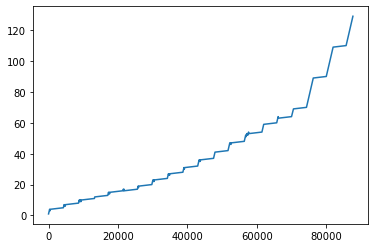

In [29]:
x= np.array(timess)-timess[0]
plt.plot(x,locs)

In [30]:
x[-1]

87724.26462650299

In [33]:
array_to_html(np.transpose(np.array([x,locs])))

,0,1
0,0.000000,1.0
1,103.928277,2.0
2,209.004200,3.0
3,312.903671,4.0
4,416.597970,3.0
5,521.325860,4.0
6,4268.318443,5.0
7,4373.283063,6.0
8,4477.386781,7.0
9,4581.469565,6.0
